<h3>Problem Statement</h3>
<br>

We have a dataset which classified if patients have heart disease or not according to features in it. We will attempt to utilize this information to make models which attempts to predict if a patient has this illness or not. We will use naive byes, decision tree and logistic regression algorithms and compare the accuracies so as to select the best model.

Data Source - Kaggle.com 
<br>
Link - https://www.kaggle.com/ronitf/heart-disease-uci

Attributes in data:

1. age - age in years <br>
2. sex - (1 = male; 0 = female) <br>
3. cp - chest pain type <br>
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) <br>
5. chol - serum cholestoral in mg/dl <br>
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
7. restecg - resting electrocardiographic results <br>
8. thalach - maximum heart rate achieved <br>
9. exang - exercise induced angina (1 = yes; 0 = no) <br>
10. oldpeak - ST depression induced by exercise relative to rest <br>
11. slope - the slope of the peak exercise ST segment <br>
12. ca - number of major vessels (0-3) colored by flourosopy <br>
13. thal - 3 = normal; 6 = fixed defect; 7 = reversable defect <br>
14. target - have disease or not (1=yes, 0=no)<br>

<h3> Importing Libraries and Reading the Data</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import pandas as pd
df=pd.read_csv(r"/Users/himanshusingh/Desktop/heart.csv")

<h3>Head - The head() function is used to get the first n rows. This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it. </h3>

In [3]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [5]:
df.head(10)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


<h3>Info - The info() function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.</h3>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

<h3>Nunique - nunique() function return number of unique elements in the object. It returns a scalar value which is the count of all the unique values in the Index. By default the NaN values are not included in the count.</h3>

In [7]:
df.nunique()

age                         41
sex                          2
chest_pain_type              4
resting_blood_pressure      49
cholesterol                152
fasting_blood_sugar          2
rest_ecg                     3
max_heart_rate_achieved     91
exercise_induced_angina      2
st_depression               40
st_slope                     3
num_major_vessels            5
thalassemia                  4
target                       2
dtype: int64

<h3>Describe - Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.</h3>

In [8]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<h3>Isnull - isnull() function detect missing values in the given series object. It return a boolean same-sized object indicating if the values are NA. Missing values gets mapped to True and non-missing value gets mapped to False.</h3>

In [9]:
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

<h3> Analysing the Data</h3>

<h3>Mean - mean() function return the mean of the values for the requested axis. If the method is applied on a pandas series object, then the method returns a scalar value which is the mean value of all the observations in the dataframe.</h3>

In [10]:
df.mean()

age                         54.366337
sex                          0.683168
chest_pain_type              0.966997
resting_blood_pressure     131.623762
cholesterol                246.264026
fasting_blood_sugar          0.148515
rest_ecg                     0.528053
max_heart_rate_achieved    149.646865
exercise_induced_angina      0.326733
st_depression                1.039604
st_slope                     1.399340
num_major_vessels            0.729373
thalassemia                  2.313531
target                       0.544554
dtype: float64

<h3>Median - Median Function in python pandas is used to calculate the median or middle value of a given set of numbers, Median of a data frame, median of column and median of rows.</h3>

In [11]:
df.median()

age                         55.0
sex                          1.0
chest_pain_type              1.0
resting_blood_pressure     130.0
cholesterol                240.0
fasting_blood_sugar          0.0
rest_ecg                     1.0
max_heart_rate_achieved    153.0
exercise_induced_angina      0.0
st_depression                0.8
st_slope                     1.0
num_major_vessels            0.0
thalassemia                  2.0
target                       1.0
dtype: float64

<h3>Mode - mode() function gets the mode(s) of each element along the axis selected. Adds a row for each mode per label, fills in gaps with nan.</h3>

In [12]:
df.mode()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,58.0,1.0,0.0,120.0,197,0.0,1.0,162.0,0.0,0.0,2.0,0.0,2.0,1.0
1,NaN,NaN,NaN,NaN,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3>Standard deviation - std() function return sample standard deviation over requested axis. The standard deviation is normalized by N-1 by default.</h3>

In [13]:
df.std()

age                         9.082101
sex                         0.466011
chest_pain_type             1.032052
resting_blood_pressure     17.538143
cholesterol                51.830751
fasting_blood_sugar         0.356198
rest_ecg                    0.525860
max_heart_rate_achieved    22.905161
exercise_induced_angina     0.469794
st_depression               1.161075
st_slope                    0.616226
num_major_vessels           1.022606
thalassemia                 0.612277
target                      0.498835
dtype: float64

<h3>Variance - var() function return unbiased variance over requested axis. The variance is normalized by N-1 by default. This can be changed using the ddof argument.</h3>

In [14]:
df.var()

age                          82.484558
sex                           0.217166
chest_pain_type               1.065132
resting_blood_pressure      307.586453
cholesterol                2686.426748
fasting_blood_sugar           0.126877
rest_ecg                      0.276528
max_heart_rate_achieved     524.646406
exercise_induced_angina       0.220707
st_depression                 1.348095
st_slope                      0.379735
num_major_vessels             1.045724
thalassemia                   0.374883
target                        0.248836
dtype: float64

<h3>Quartile - Pandas dataframe.quantile() function return values at the given quantile over requested axis, a numpy.percentile.</h3>

In [15]:
df.quantile([0.25,0.5,0.75])

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0.25,47.5,0.0,0.0,120.0,211.0,0.0,0.0,133.5,0.0,0.0,1.0,0.0,2.0,0.0
0.50,55.0,1.0,1.0,130.0,240.0,0.0,1.0,153.0,0.0,0.8,1.0,0.0,2.0,1.0
0.75,61.0,1.0,2.0,140.0,274.5,0.0,1.0,166.0,1.0,1.6,2.0,1.0,3.0,1.0


<h3> Visualising the Data</h3>

<h3>Heat map - A heatmap is a graphical representation of data that uses a system of color-coding to represent different values..</h3>

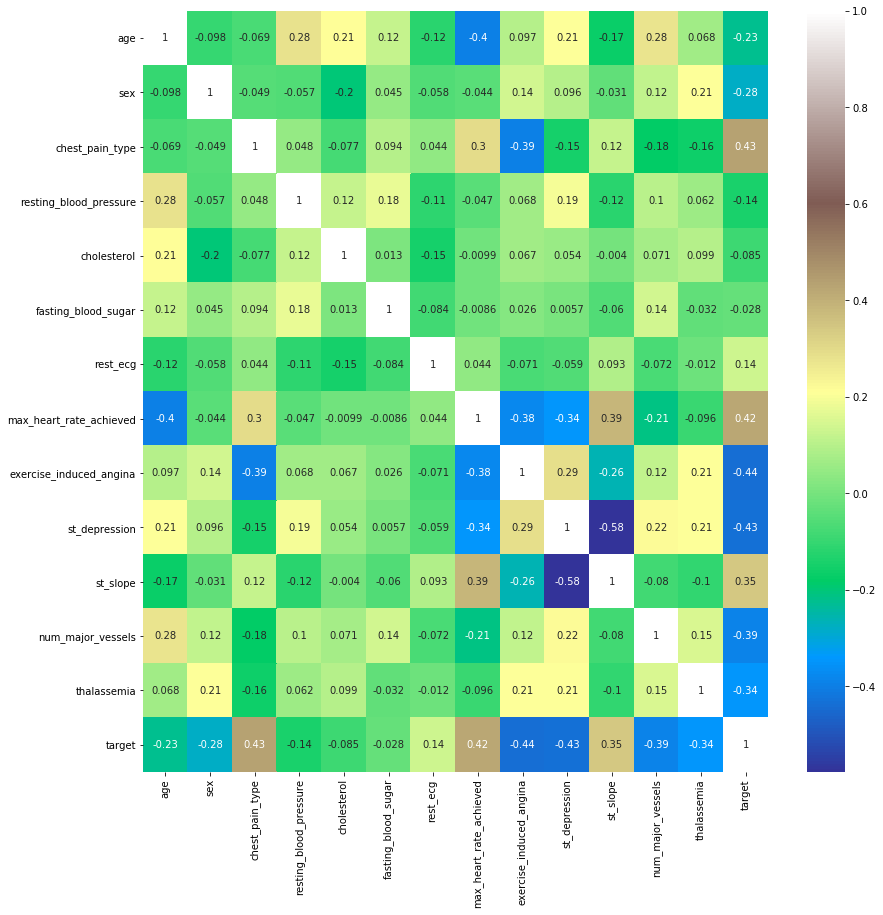

In [16]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, cmap='terrain')

<h3>Correlation Matrix - A correlation matrix is simply a table which displays the correlation. The measure is best used in variables that demonstrate a linear relationship between each other.</h3>

In [17]:
df.corr()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain_type,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
resting_blood_pressure,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholesterol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
max_heart_rate_achieved,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exercise_induced_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
st_depression,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<h3>Pairwise plot - A pairs plot is a matrix of scatterplots that lets you understand the pairwise relationship between different variables in a dataset.</h3>

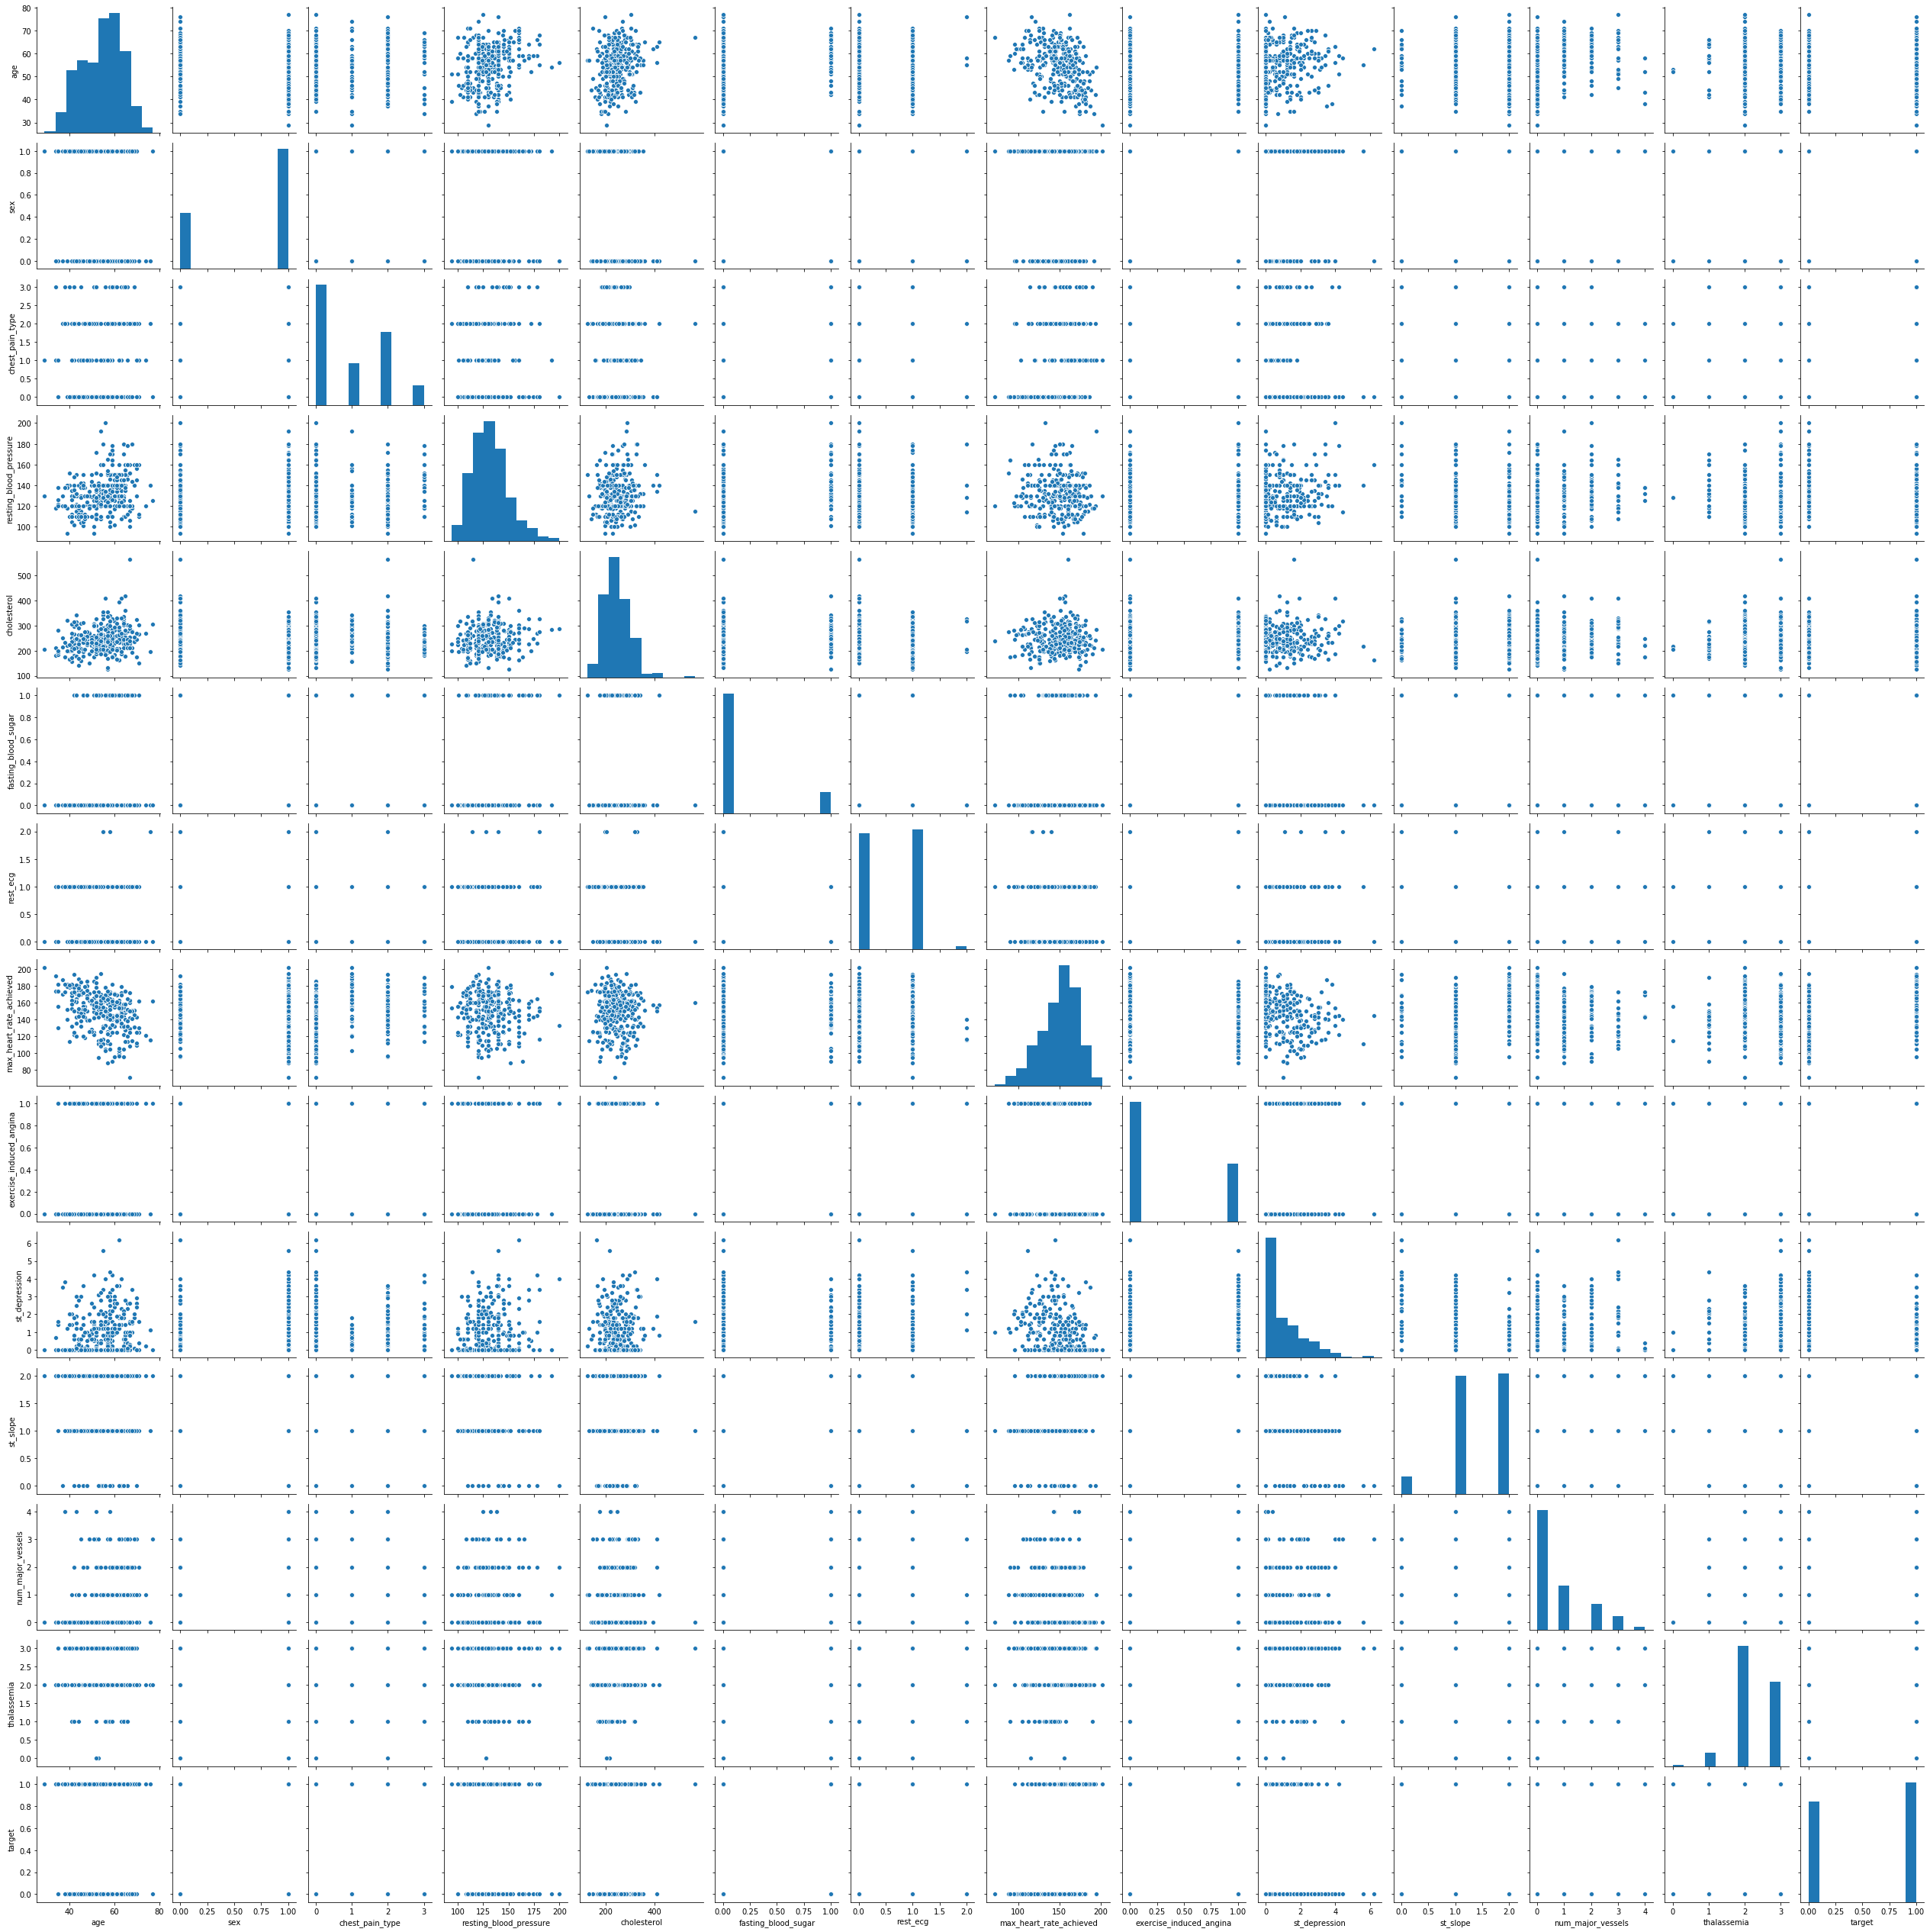

In [18]:
sns.pairplot(df)
plt.show()

<h3>Data processing</h3> 

<h3> Get Dummies - get_dummies when applied to a column of categories where we have one category per observation will produce a new column (variable) for each unique categorical value. It will place a one in the column corresponding to the categorical value present for that observation. This is equivalent to one hot encoding.</h3>

In [19]:
df = pd.get_dummies(df, columns = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'st_slope', 'num_major_vessels', 'thalassemia'])

In [20]:
df.head(10)

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,target,sex_0,sex_1,chest_pain_type_0,chest_pain_type_1,...,st_slope_2,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,num_major_vessels_4,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
5,57,140,192,148,0.4,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0
6,56,140,294,153,1.3,1,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
7,44,120,263,173,0.0,1,0,1,0,1,...,1,1,0,0,0,0,0,0,0,1
8,52,172,199,162,0.5,1,0,1,0,0,...,1,1,0,0,0,0,0,0,0,1
9,57,150,168,174,1.6,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [23]:
df.shape

(303, 31)

<h3>Dividing the data into input and output variables for our models</h3>

In [ ]:
X=df.drop(['target'],1)
Y=df.target

In [ ]:
X

In [ ]:
Y

<h3> Splitting the dataset into training and testing set</h3>

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .25, random_state=30) 

<h3> Training the Model 1 </h3>
    <h3> Model 1 : Naive Byes Classification</h3> 
    

In [ ]:
from sklearn.naive_bayes import GaussianNB 
model1 = GaussianNB() 
model1.fit(X_train, Y_train)

<h3> Testing the data </h3>

In [ ]:
Y_pred1=model1.predict(X_test)
Y_pred1

In [ ]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(Y_test, Y_pred1)
cm1

<h3> Accuracy of model </h3>
    

In [ ]:
TP=cm1[0][0]
TN=cm1[1][1]
FN=cm1[1][0]
FP=cm1[0][1]
print('Naive Bayes model accuracy:',(TP+TN)/(TP+TN+FN+FP)*100)

<h3> Training the Model 2 </h3>
    <h3> Model 2 : Decision Tree Classification</h3> 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model2 =DecisionTreeClassifier(criterion = 'entropy')
model2.fit(X_train,Y_train)

<h3> Testing the data </h3>

In [ ]:
Y_pred2=model2.predict(X_test)
Y_pred2

In [ ]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(Y_test, Y_pred2)
cm2

<h3> Accuracy of model </h3>

In [ ]:
TP=cm2[0][0]
TN=cm2[1][1]
FN=cm2[1][0]
FP=cm2[0][1]
print('Decision Tree model accuracy:',(TP+TN)/(TP+TN+FN+FP)*100)

<h3> Training the Model 3  </h3>
    <h3> Model 3 : Logistic Regression</h3> 

In [ ]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(X_train,Y_train)

<h3> Testing the data </h3>
   

In [ ]:
Y_pred3 =model3.predict(X_test)
Y_pred3

In [ ]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(Y_test, Y_pred3)
cm3

<h3> Accuracy of model </h3>
    

In [ ]:
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]
print('Logistic Regression model accuracy:',(TP+TN)/(TP+TN+FN+FP)*100)

<h3> Results and Analysis</h3>


We observe positive correlation in chest pain type ,resting electrocardiographic results , maximum heartrate and the slope of the peak exercise ST segment attributes with respect to target.

And we observe negative correlation in age , sex , resting blood pressure , blood sugar , cholestrol , depression num_major_vessels and thalassemia attributes with respect to target.


Accuracy of models :

1. Model 1 ( Naive Byes Classification)      -     88.15%
2. Model 2 ( Decision Tree Classification)   -     69.73%
3. Model 3 ( Logistic Regression)            -     86.84%

Therefore from the above results , it is clear that Model 1 which is based on Naive Byes Classification Algorithm is performing best with an accuracy of 88.15% .

<h3>Conclusion</h3>
<br>
Cardiovascular disease has been a major killer for many years. We think the reasons are our lack of knowledge about heart disease and lifestyle habits.<br>

We think the most obvious sign is chest pain. There are four types of chest pain. No matter what type of chest pain you have, go to the doctor if possible.<br>

In addition, everyone should always look for resting blood pressure. A well-rested blood pressure is below 120mmHg, but if your blood pressure is much lower than 120mmHg, it means you are at a higher risk of heart disease. Otherwise, the problem will not be heart disease only when the blood pressure is above 150mmHg.<br>

There are many electronic devices that can measure heart rate, so it's easy to take care of yourself. Record a large heart rate to make sure your heart is still healthy. If the rate goes up year by year, there must be something wrong with you.<br>

No matter how healthy we are, we have to do an annual exam because some aspects are not taken care of by ourselves. Finally, don't forget as we age, the risk increasees.